In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('fyp.csv')

In [3]:
dataset.shape

(4935, 7)

In [4]:
prices_dataset_train = dataset.iloc[:3948,:]
prices_dataset_test = dataset.iloc[3949:,:]

In [5]:
trainingset = dataset.iloc[:3948,5:6].values
testset = dataset.iloc[3949:,5:6].values

In [6]:
# Normalization
min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_trainingset = min_max_scaler.fit_transform(trainingset)

In [7]:
X_train = []
y_train = []

In [8]:
for i in range(40,3948):
    X_train.append(scaled_trainingset[i-40:i,0])
    y_train.append(scaled_trainingset[i,0])

In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [11]:
# LSTM MODEL
# Architecture

In [12]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Optimizer
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.0067
Epoch 2/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.0026
Epoch 3/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.0022
Epoch 4/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.0023
Epoch 5/100
3908/3908 [==============================] - 9s 2ms/step - loss: 0.0019
Epoch 6/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.0017
Epoch 7/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.0018
Epoch 8/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.0016
Epoch 9/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.0015
Epoch 10/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.0013
Epoch 11/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.0014
Epoch 12/100
3908/3908 [==

3908/3908 [==============================] - 7s 2ms/step - loss: 7.5991e-04
Epoch 92/100
3908/3908 [==============================] - 7s 2ms/step - loss: 7.5770e-04
Epoch 93/100
3908/3908 [==============================] - 7s 2ms/step - loss: 8.4819e-04
Epoch 94/100
3908/3908 [==============================] - 376s 96ms/step - loss: 8.0528e-04
Epoch 95/100
3908/3908 [==============================] - 7s 2ms/step - loss: 8.0840e-04
Epoch 96/100
3908/3908 [==============================] - 8s 2ms/step - loss: 8.5046e-04
Epoch 97/100
3908/3908 [==============================] - 8s 2ms/step - loss: 8.2047e-04
Epoch 98/100
3908/3908 [==============================] - 8s 2ms/step - loss: 8.4962e-04
Epoch 99/100
3908/3908 [==============================] - 8s 2ms/step - loss: 8.1922e-04
Epoch 100/100
3908/3908 [==============================] - 8s 2ms/step - loss: 8.1169e-04


In [14]:
dataset_total = dataset.iloc[:,5:6]

In [17]:
inputs = dataset_total[len(dataset_total)-len(prices_dataset_test)-40:].values
inputs = inputs.reshape(-1,1)

In [18]:
inputs = min_max_scaler.transform(inputs)

In [19]:
X_test = []

In [20]:
for i in range(40,len(prices_dataset_test)+40):
    X_test.append(inputs[i-40:i,0])

In [21]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions = min_max_scaler.inverse_transform(predictions)

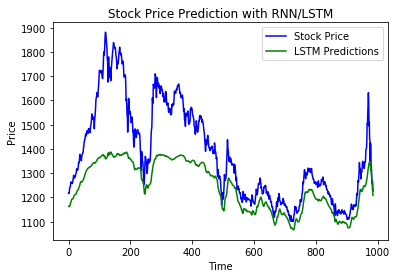

In [24]:
# Plotting
plt.plot(testset, color='blue', label='Stock Price')
plt.plot(predictions, color='green', label='LSTM Predictions')
plt.title('Stock Price Prediction with RNN/LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()